In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 4 Logistic Regression and Softmax Regression

4.1 Logistic Regression

4.2 Softmax Regression

## 4.1 Logistic Regression

Logistic Regression is an algorithm used for binary classification.

Logistic regression makes predictions using the formula:

$$
\mbox{prediction} \quad \widehat{p} = \sigma(x_1\theta_1+x_2\theta_2+\cdots+x_n\theta_n)
$$


The function $\sigma$ is called the **sigmoid function** (or logistic function)

$$
\sigma(t) = \frac{1}{1+e^{-t}}
$$

In [2]:
'sigmoid function'
def sigmoid(t):
    return 1/(1+np.exp(-t))

Text(0.5, 1.0, 'Sigmoid Function')

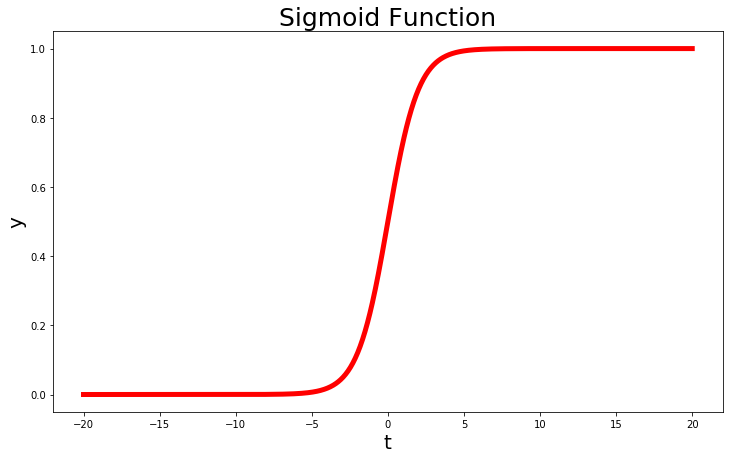

In [9]:
'plot sigmoid function'
x_plot = np.linspace(-20,20,1000)
y_plot = sigmoid(x_plot)
plt.figure(figsize=(12,7))
plt.plot(x_plot,y_plot,'r-',linewidth=5)
plt.xlabel('t',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('Sigmoid Function', fontsize=25)

We can transform the prediction $\widehat{y}$ to binary outcome using the rule

$$
\widehat{y} = \left\{\begin{array}{lr}
0 & \mbox { if }\quad \widehat{p}<0.5\\
1 & \mbox{ if }\quad \widehat{p}\geq 0.5
\end{array}\right.
$$

The logistic regression model is trained using the **cost function**:

$$
E(\theta) = -\frac{1}{m}\sum_{i=1}^m\left[ y_i \log(\widehat{p}_i)+(1-\widehat{p}_i)\log(1-\widehat{p}_i) \right]
$$

In [1]:
'cost function'
def cost(y,X,theta):
    m = len(y)
    return -1/m*(y.T@np.log(sigmoid(X@theta))+(1-y).T@np.log(1-sigmoid(X@theta)))

The **gradient** of the logistic regression model is given by

$$
\nabla E(\theta) = \frac{1}{m} X^T(\sigma(X\theta)-y)
$$

We can train the logistic regression model using **Gradient Descent**

In [2]:
'Logistic regression with Gradient Descent'
def log_regression_GD(X,y,s,n_iterations):
    m,n = X.shape
    theta = np.random.randn(n,1)
    E = np.zeros((n_iterations,1))
    for i in range(n_iterations):
        gradient = (1/m)*X.T@(sigmoid(X@theta)-y) # compute gradient
        theta = theta - s*gradient # Gradient Descent Step
        E[i] = cost(y,X,theta) # compute the cost function
    return E,theta

Let's use the iris dataset to illustrate logistic regression

In [12]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5) #first 5 rows

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


There are three species:

In [13]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Let's try to build a classifier to detect the *Iris-setosa* type

In [17]:
m = len(iris_data)

'vector y'
y = np.zeros((m,1))
y[iris_data['species']=='Iris-setosa']=1

'matrix X'
X = iris_data.iloc[:,:4].to_numpy()

In [20]:
n_iterations = 100
s = .3 #learning rate
E,theta = log_regression_GD(X,y,s,n_iterations)

Text(0, 0.5, 'Cost')

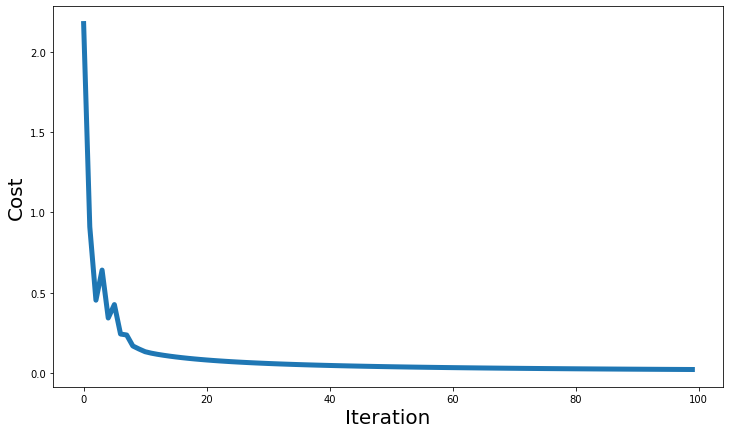

In [21]:
plt.figure(figsize=(12,7))
plt.plot(E,linewidth=5)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Cost',fontsize=20)

In [22]:
y_predicted = sigmoid(X@theta)

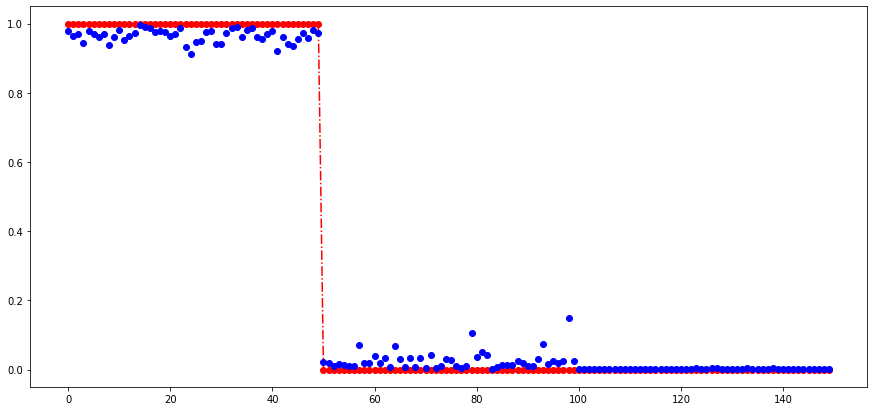

In [23]:
'compare y and y_predicted'
plt.figure(figsize=(15,7))
plt.plot(y,'ro-.')
plt.plot(y_predicted,'bo')

In [24]:
'species prediction'
y_setosa = np.zeros((m,1))
y_setosa[y_predicted>0.5]=1

In [27]:
'confusion matrix'
C = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        C[i,j] = sum(y_setosa[y==i]==j)
C

array([[100.,   0.],
       [  0.,  50.]])

**Another Example: Predicting Breast Cancer**

In [35]:
'from https://archive.ics.uci.edu'
'Breast Cancer Wisconsin (Diagnostic) Data Set'

url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/cancer.csv'
data_cancer = pd.read_csv(url,index_col=0)
data_cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
'M: Malignant'
'B: Benign' 
data_cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [30]:
'features: breast tumor cells features'
'10 features; for each feature: mean, standard error, worst (largest)'
data_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

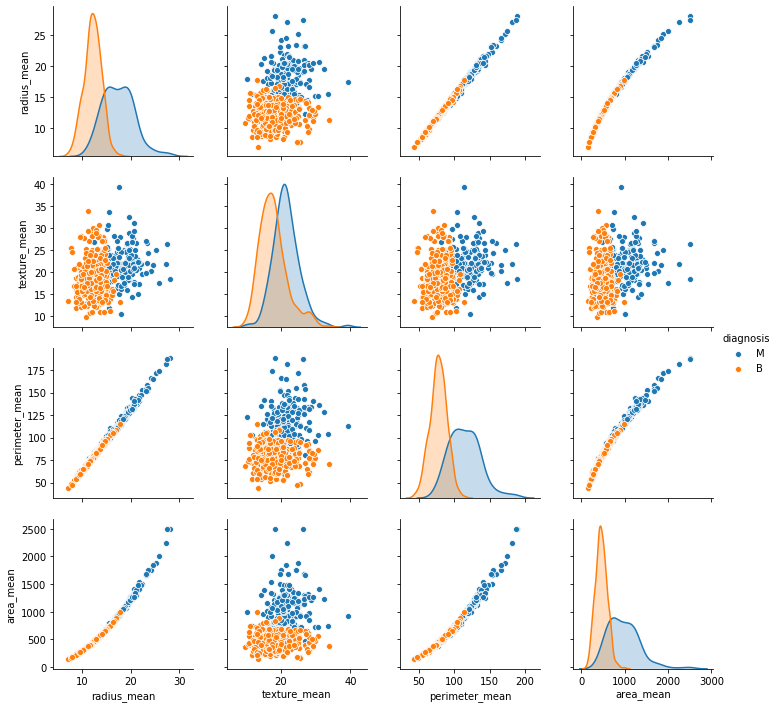

In [31]:
sns.pairplot(data=data_cancer.iloc[:,:5],hue='diagnosis')

In [36]:
diagnosis = data_cancer['diagnosis']
data_cancer = data_cancer.iloc[:,1:11] #use only first 10 features
data_cancer.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [37]:
'scale features: Gradient Descent works better if we scale the features'
means = data_cancer.mean() # mean of each feature
stds = data_cancer.std() # standard deviation of each feature
scaled_data_cancer = (data_cancer-means)/stds #subtract the mean, divide by the standard deviation
scaled_data_cancer.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
84348301,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956


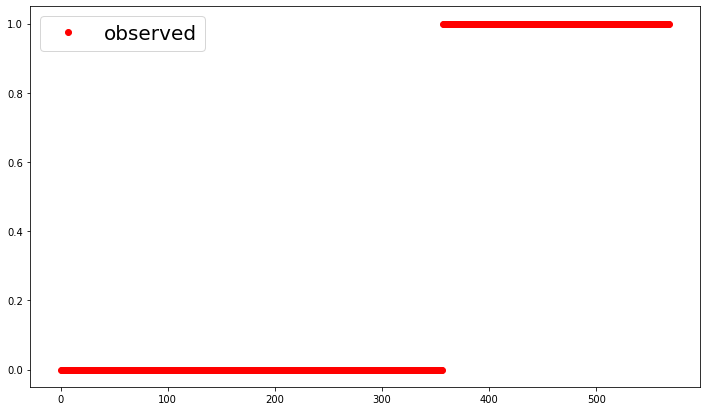

In [41]:
m = len(data_cancer)

'the vector y'
y = np.zeros((m,1))
y[diagnosis=='M']=1
plt.figure(figsize=(12,7))
plt.plot(np.sort(y,axis=0),'ro', label = 'observed')
plt.legend(fontsize=20)

In [39]:
'the matrix X'
X = scaled_data_cancer.iloc[:,:10].to_numpy()
X.shape

(569, 10)

Text(0, 0.5, 'Cost')

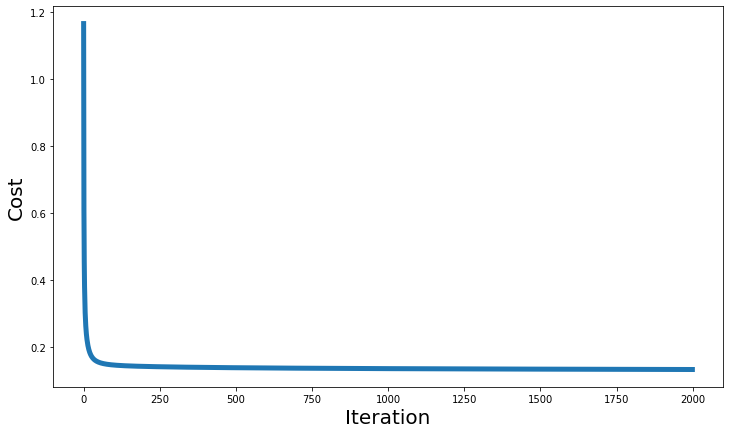

In [42]:
n_iterations = 2000
s = 1 #learning rate
E,theta = log_regression_GD(X,y,s,n_iterations)

plt.figure(figsize=(12,7))
plt.plot(E,linewidth=5)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Cost',fontsize=20)

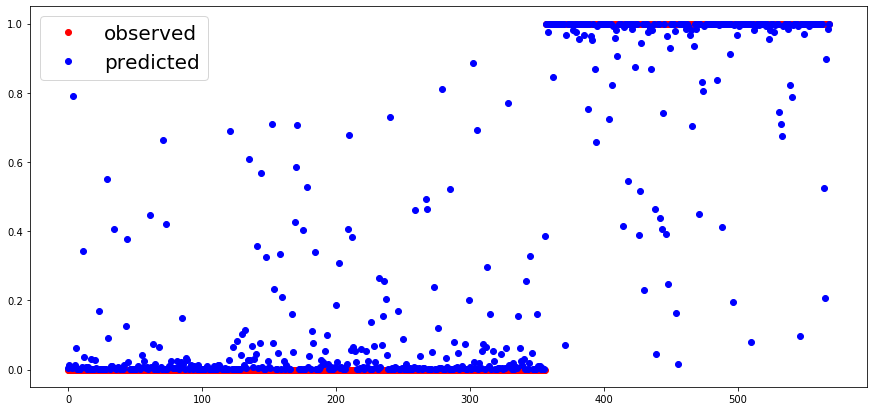

In [44]:
y_predicted = sigmoid(X@theta)

plt.figure(figsize=(15,7))
plt.plot(np.sort(y,axis=0),'ro',label='observed')
plt.plot(y_predicted[(np.argsort(y,axis=0)).flatten()],'bo',label = 'predicted')
plt.legend(fontsize=20)

In [45]:
'predictor function'
def predictor(y,p):
    n = len(y)
    yy = np.zeros((n,1))
    yy[y>=p]=1
    return yy

In [46]:
p = 0.5
predictions = predictor(y_predicted,p)

In [47]:
'confusion matrix'
C = np.zeros((2,2))
'observed M; predicted M'
C[0,0] = sum(predictions[y==1]==1)
'observed M; predicted B'
C[1,0] = sum(predictions[y==1]==0)
'observed B; predicted M'
C[0,1] = sum(predictions[y==0]==1)
'observed B; predicted B'
C[1,1] = sum(predictions[y==0]==0)

C

array([[194.,  17.],
       [ 18., 340.]])

## 4.2 Softmax Regression

Softmax regression is a generalization of logistic regression to the case where we want to handle multiple classes ($k$ classes)

In [48]:
def softmax(X,theta):
    m,n = X.shape
    _,k = theta.shape
    Y = np.exp(X@theta)
    d = np.linalg.norm(Y,ord=1,axis=1) # with ord=1, it computes 1-norm
    return np.diag(1/d)@Y

In [49]:
'example; notice that the entries of each row add to 1'
X = np.random.randn(5,3)
theta = np.random.randn(3,2)
Yhat = softmax(X,theta)
Yhat

array([[0.37431324, 0.62568676],
       [0.03915899, 0.96084101],
       [0.1183274 , 0.8816726 ],
       [0.08227748, 0.91772252],
       [0.12336753, 0.87663247]])

In [50]:
def cost_softmax(X,theta,Y):
    m,n = X.shape
    _,k = theta.shape
    cost = 0
    Yhat = softmax(X,theta)
    for i in range(m):
        for j in range(k):
            cost = cost + Y[i,j]*np.log(Yhat[i,j])
    # alternative formula: cost = np.trace(Y.T@np.log(Yhat))
    return (-1/m)*cost

In [51]:
def softmax_regression_GD(X,y,s,n_iterations):
    m,n = X.shape
    _,k = Y.shape
    theta = np.random.randn(n,k)
    E = np.zeros((n_iterations,1))
    for i in range(n_iterations):
        gradient = (1/m)*X.T@(softmax(X,theta)-Y)
        theta = theta - s * gradient
        E[i] = cost_softmax(X,theta,Y)
    return E,theta

In [52]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5) #first 5 rows

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
X = iris_data.iloc[:,0:4].to_numpy()
m,n = X.shape
m,n

(150, 4)

In [11]:
iris_data['species'].unique() # k = 3

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [54]:
k = 3 #three classes
Y = np.zeros((m,k))
'column 0'
Y[iris_data['species']=='Iris-setosa',0]=1
'column 1'
Y[iris_data['species']=='Iris-versicolor',1]=1
'column 2'
Y[iris_data['species']=='Iris-virginica',2]=1

In [55]:
y = np.zeros((m,1))
y[iris_data['species']=='Iris-versicolor']=1
y[iris_data['species']=='Iris-virginica']=2

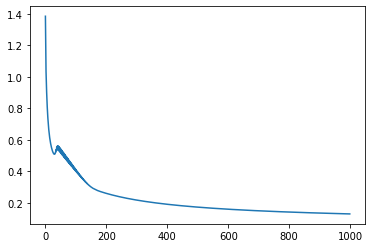

In [56]:
s = 0.1
n_iterations = 1000
E,theta = softmax_regression_GD(X,Y,s,n_iterations)
plt.plot(E)

In [57]:
P = softmax(X,theta)
np.round(P,3) #round entries of P to three decimals

array([[0.992, 0.008, 0.   ],
       [0.978, 0.022, 0.   ],
       [0.988, 0.012, 0.   ],
       [0.963, 0.037, 0.   ],
       [0.993, 0.007, 0.   ],
       [0.994, 0.006, 0.   ],
       [0.989, 0.011, 0.   ],
       [0.984, 0.016, 0.   ],
       [0.96 , 0.04 , 0.   ],
       [0.962, 0.038, 0.   ],
       [0.993, 0.007, 0.   ],
       [0.971, 0.029, 0.   ],
       [0.968, 0.032, 0.   ],
       [0.987, 0.013, 0.   ],
       [0.999, 0.001, 0.   ],
       [0.999, 0.001, 0.   ],
       [0.999, 0.001, 0.   ],
       [0.994, 0.006, 0.   ],
       [0.992, 0.008, 0.   ],
       [0.995, 0.005, 0.   ],
       [0.973, 0.027, 0.   ],
       [0.995, 0.005, 0.   ],
       [0.998, 0.002, 0.   ],
       [0.983, 0.017, 0.   ],
       [0.899, 0.101, 0.   ],
       [0.952, 0.048, 0.   ],
       [0.986, 0.014, 0.   ],
       [0.989, 0.011, 0.   ],
       [0.991, 0.009, 0.   ],
       [0.956, 0.044, 0.   ],
       [0.952, 0.048, 0.   ],
       [0.994, 0.006, 0.   ],
       [0.995, 0.005, 0.   ],
       [0.

In [58]:
def predictor_softmax(X,theta):
    P = softmax(X,theta)
    return np.argmax(np.round(P,2),axis=1)

In [59]:
y_predicted = predictor_softmax(X,theta)
y_predicted = y_predicted[:,None]

In [60]:
'Confusion matrix'
C = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        C[i,j]=sum(y_predicted[y==i]==j)
C

array([[50.,  0.,  0.],
       [ 0., 47.,  3.],
       [ 0.,  2., 48.]])